# DATA SCIENCE 100: Group 128 Project Proposal
##### Jiakang Huang, Cameron Seymour, Nav Thukral, Shirley Chen
##### Date: October 29th, 2022
 

## Import packages:

In [11]:
# Use the library function to load the R packages
library(tidyverse)
library(repr)
library(readxl)
library(cowplot)
library(RColorBrewer)

## Introduction:
Birds are a very diverse class of animals, living in all available climates across the world and functioning in very different ways. While most people associate the thought of a bird with a flying bird, there are many different types of birds including terrestrial birds and aerial birds. Terrestrial birds are defined as birds that spend most of their lives on the ground, with their appearances usually characterized by shorter wings and bulkier bodies, making flying more difficult for them (Aerial, Terrestrial, n.d.). Aerial birds can be defined as birds that spend most of their lives in the air, with their appearances characterized by streamlined, slender bodies with long wingspans (Aerial, Terrestrial, n.d.). For this report, our predictive question is:

Based on the bone structure of bird skeletons, such as the length of leg bones, and the length of wing bones, can we predict whether a given bird skeleton belonged to a flying bird or a terrestrial bird? 
 
The dataset we are using is a collection from the [National History Museum of Los Angeles County](https://letsvolunteerla.org/listing-item/natural-history-museum-los-angeles-county/). It features measurements of the length and diameter of the major wing and leg bones from 420 bird skeletons. 


<img src="https://media.giphy.com/media/l0K4du1KDvQ8MRPqg/giphy.gif" width = "600"/>

Source: https://media.giphy.com/media/l0K4du1KDvQ8MRPqg/giphy.gif


## Data Analysis:

In [2]:
# Read the csv file data from internat into R
bird_data <- read.csv("https://raw.githubusercontent.com/DanielHuangjiakang/Projcet-Group-128-DSCI-100/main/bird%202.csv", header = TRUE)
head(bird_data, n = 20) 

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
2,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
3,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
4,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
5,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW
6,5,61.92,4.78,50.46,3.47,49.52,4.41,56.95,2.73,29.07,2.83,SW
7,6,79.73,5.94,67.39,4.50,42.07,3.41,71.26,3.56,37.22,3.64,SW
8,7,86.98,5.68,74.52,4.55,44.46,3.78,76.02,3.81,37.94,3.81,SW
9,8,118.20,7.82,116.64,6.13,59.33,5.45,110.00,5.58,61.62,4.37,SW


## PIGEON SKELETON:

<img src="https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg" width = "400"/>

Source: https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg

#### There are 420 birds contained in this dataset. Each bird is represented by 10 measurements (features):
* Huml: Length of Humerus (mm)
* Humw: Diameter of Humerus (mm)
* Ulnal: Length of Ulna (mm)
* Ulnaw: Diameter of Ulna (mm)
* Feml: Length of Femur (mm)
* Femw: Diameter of Femur (mm)
* Tibl: Length of Tibiotarsus (mm)
* Tibw: Diameter of Tibiotarsus (mm)
* Tarl: Length of Tarsometatarsus (mm)

#### Each bird has a label for its ecological group:
* SW: Swimming Birds
* W: Wading Birds
* T: Terrestrial Birds
* R: Raptors
* P: Scansorial Birds
* SO: Singing Birds

In [13]:
# Calculate the average of every measurements of the body bone.
bird_bar <- bird_data |>
    select(-id) |>
    group_by(type) |>
    summarize(average_huml = mean(huml, na.rm = TRUE),
             average_humw = mean(humw, na.rm = TRUE),
             average_ulnal = mean(ulnal, na.rm = TRUE),
             average_ulnaw = mean(ulnaw, na.rm = TRUE),
             average_feml = mean(feml, na.rm = TRUE),
             average_femw = mean(femw, na.rm = TRUE),
             average_tibl = mean(tibl, na.rm = TRUE),
             average_tibw = mean(tibw, na.rm = TRUE),
             average_tarl = mean(tarl, na.rm = TRUE),
             average_tarw = mean(tarw, na.rm = TRUE))
bird_bar

type,average_huml,average_humw,average_ulnal,average_ulnaw,average_feml,average_femw,average_tibl,average_tibw,average_tarl,average_tarw
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
P,34.42395,3.039211,39.17737,2.476316,28.21737,2.307895,41.88132,2.095789,25.78737,1.902632
R,86.93440,6.065600,100.34245,4.813265,62.02000,5.266800,89.87740,4.949200,59.16633,5.073878
SO,22.36110,2.029764,26.39810,1.743858,21.38346,1.680313,36.32603,1.548740,25.84266,1.349375
SW,110.25112,6.423966,111.75552,5.221638,42.16966,4.275776,85.31707,4.513534,45.15621,4.149914
T,45.69957,4.786087,45.61739,3.471739,46.27739,3.819565,66.09087,3.451739,40.08652,3.183913
W,73.13308,4.607077,78.10138,4.102615,40.11953,3.118594,76.15000,3.179231,47.54338,2.760308


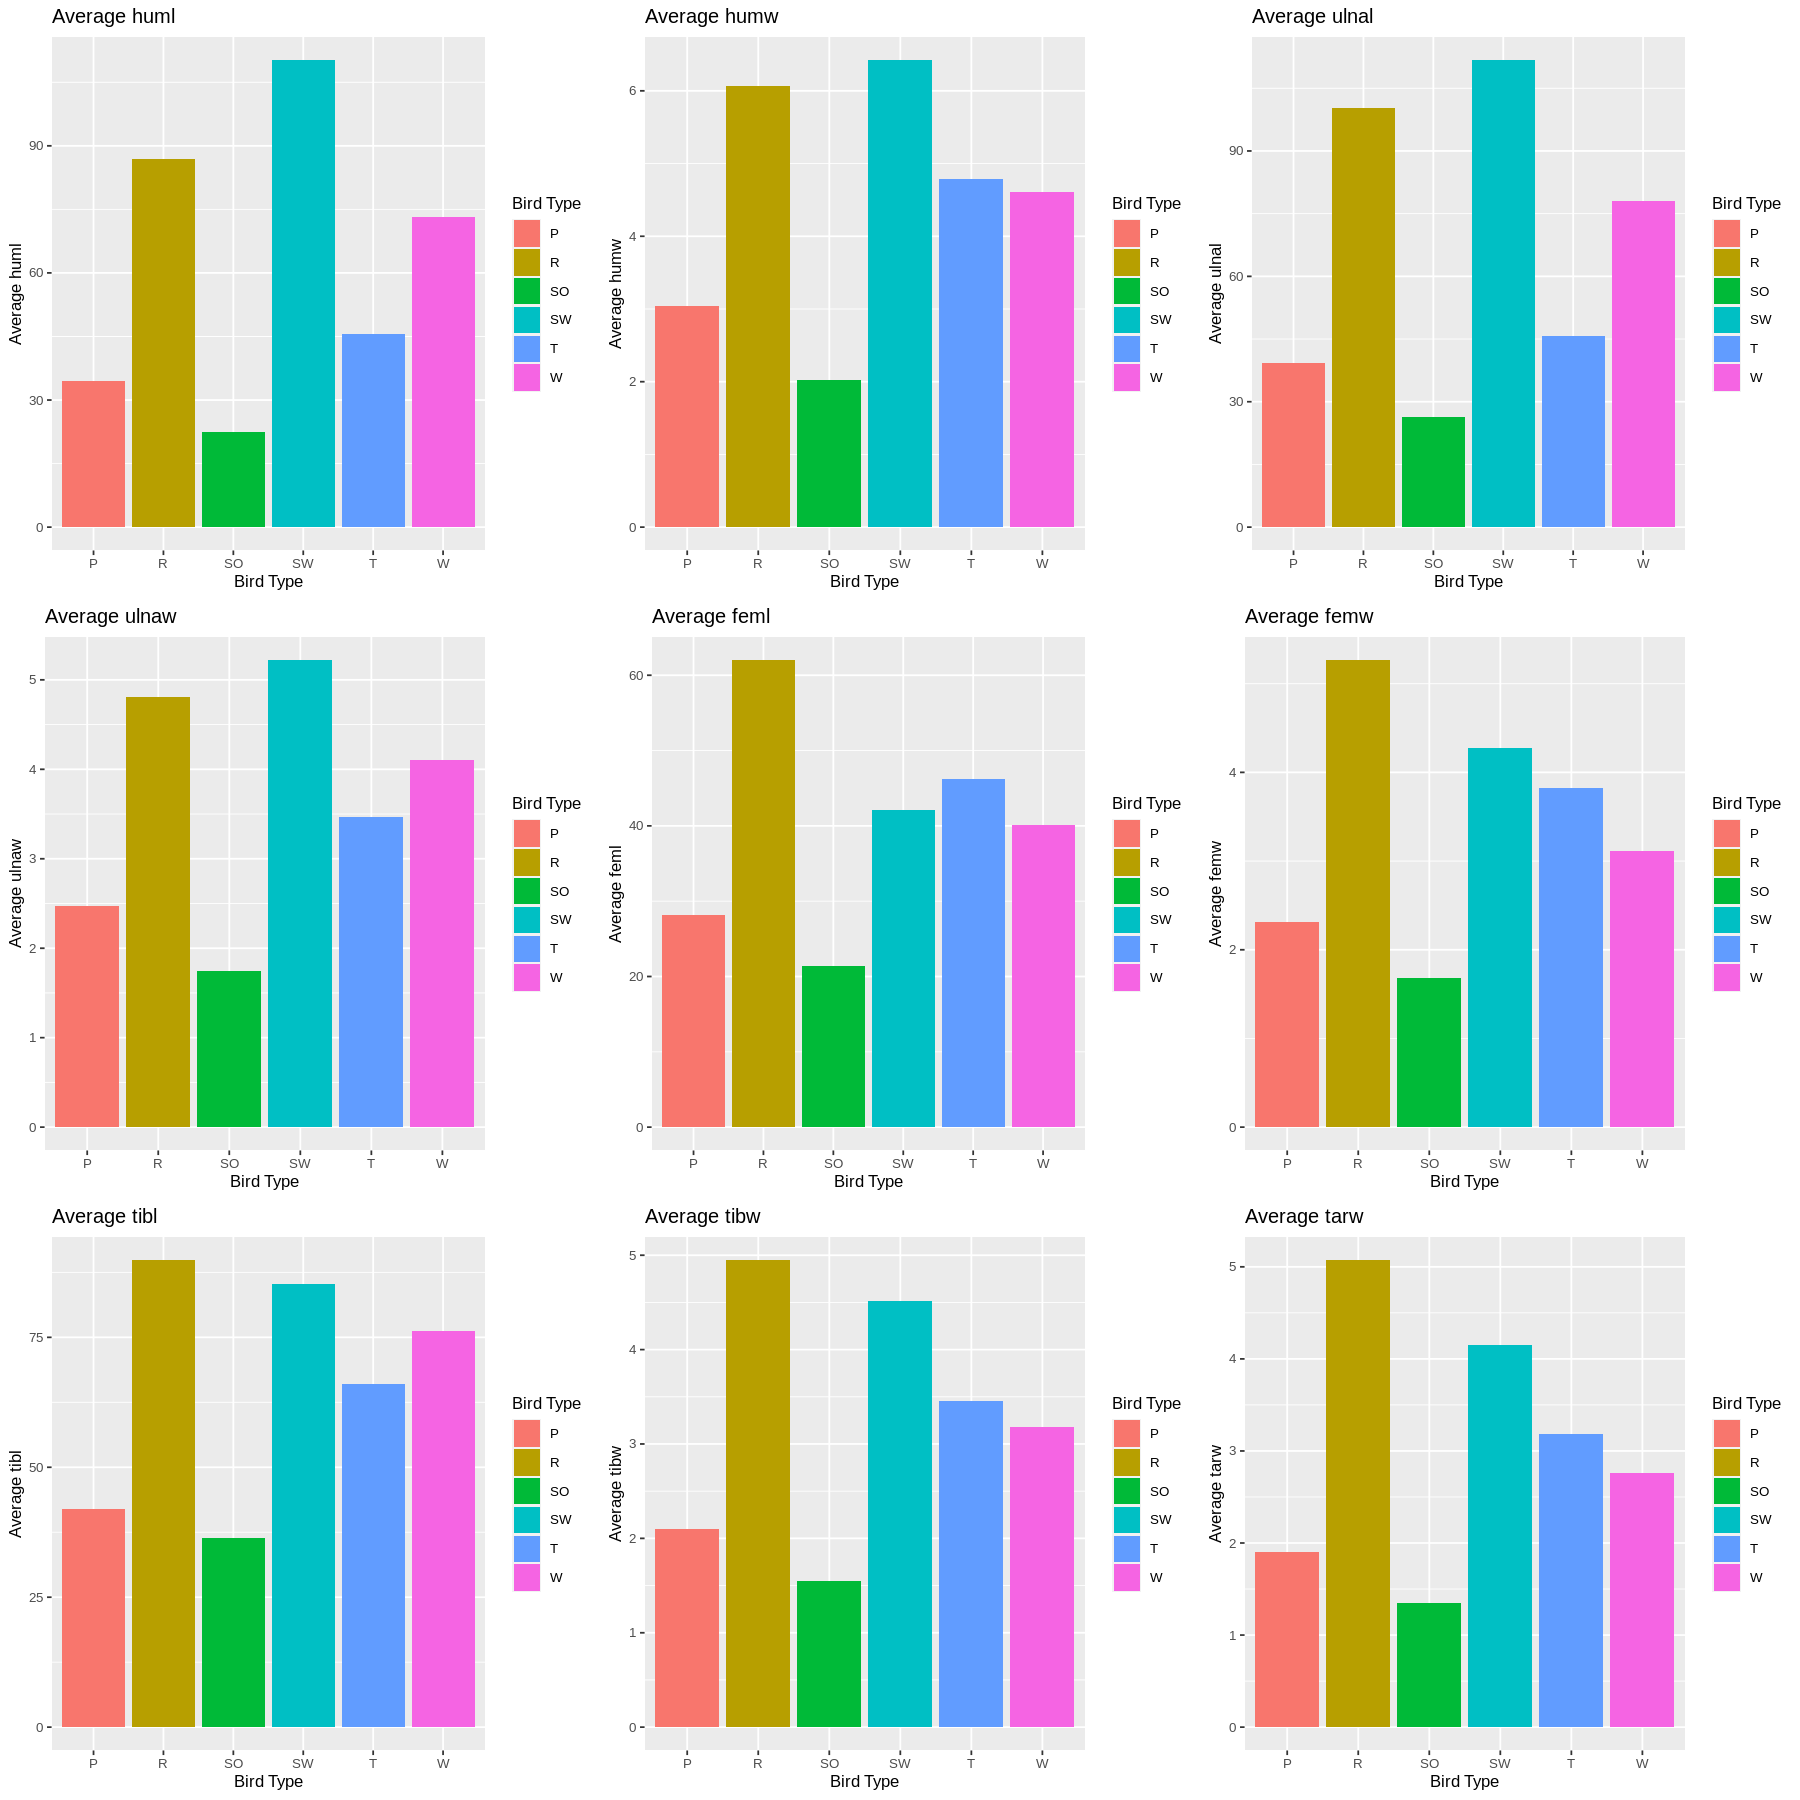

In [14]:
# Use the the average of every measurements from the part of the body bone to draw the graph of each data, 
# to see have difference of each type.
options(repr.plot.width = 15, repr.plot.height = 15) 
bird_huml <- bird_bar |>
        ggplot(aes(x = type, y = average_huml, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average huml") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average huml")

bird_humw <- bird_bar |>
        ggplot(aes(x = type, y = average_humw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average humw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average humw")

bird_ulnal <- bird_bar |>
        ggplot(aes(x = type, y = average_ulnal, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average ulnal") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average ulnal")

bird_ulnaw <- bird_bar |>
        ggplot(aes(x = type, y = average_ulnaw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average ulnaw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average ulnaw")

bird_feml <- bird_bar |>
        ggplot(aes(x = type, y = average_feml, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average feml") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average feml")

bird_femw <- bird_bar |>
        ggplot(aes(x = type, y = average_femw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average femw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average femw")

bird_tibl <- bird_bar |>
        ggplot(aes(x = type, y = average_tibl, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tibl") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tibl")

bird_tibw <- bird_bar |>
        ggplot(aes(x = type, y = average_tibw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tibw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tibw")

bird_tarw <- bird_bar |>
        ggplot(aes(x = type, y = average_tarw, fill = type)) + 
            geom_bar(stat = "identity") +
            xlab("Bird Type") +
            ylab("Average tarw") +
            labs(fill = "Bird Type") +
            theme(text = element_text(size = 10)) +
            ggtitle("Average tarw")

plot_grid <- plot_grid(bird_huml, bird_humw, bird_ulnal, bird_ulnaw, bird_feml, bird_femw, 
                       bird_tibl, bird_tibw, bird_tarw, ncol = 3)
plot_grid

## Methods:
We will conduct our data analysis by classification through the K Nearest Neighbor algorithm.
The dataset we choose collects skeleton lengths in different parts of various kinds of birds. Since we will verify whether it is possible to predict whether a bird is a flying bird or not based on its skeletal structure, we need to choose the skeletal that we think can distinguish between an aerial bird and a terrestrial bird as variables.
 
As we suppose that the bone of the forelimb of aerial birds will be longer than terrestrial birds, and the long bone in the lower leg of the terrestrial bird will be longer compared to aerial birds. We will take the huml (Length of the Humerus) and tarw (Diameter of the Tarsometatarsus) as variables. All the entries (427) will be used for this training to increase the accuracy of subsequent predictions. We will classify different kinds of birds in the form of group_by and calculate the average length/diameter for each skeleton. The bone lengths of different types of birds were compared by several histograms with the x-axis as the bird's type and the y-axis as the length of the average skeleton. We can see from the histograms that the length of the skeletons varies greatly depending on the species of the bird, which indicates the feasibility of our prediction. Furthermore, we will visualize our results by a scatter plot with the x-axis as the length of the humerus and the y-axis as the diameter of the tarsometatarsus and colored by various types of birds. 

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


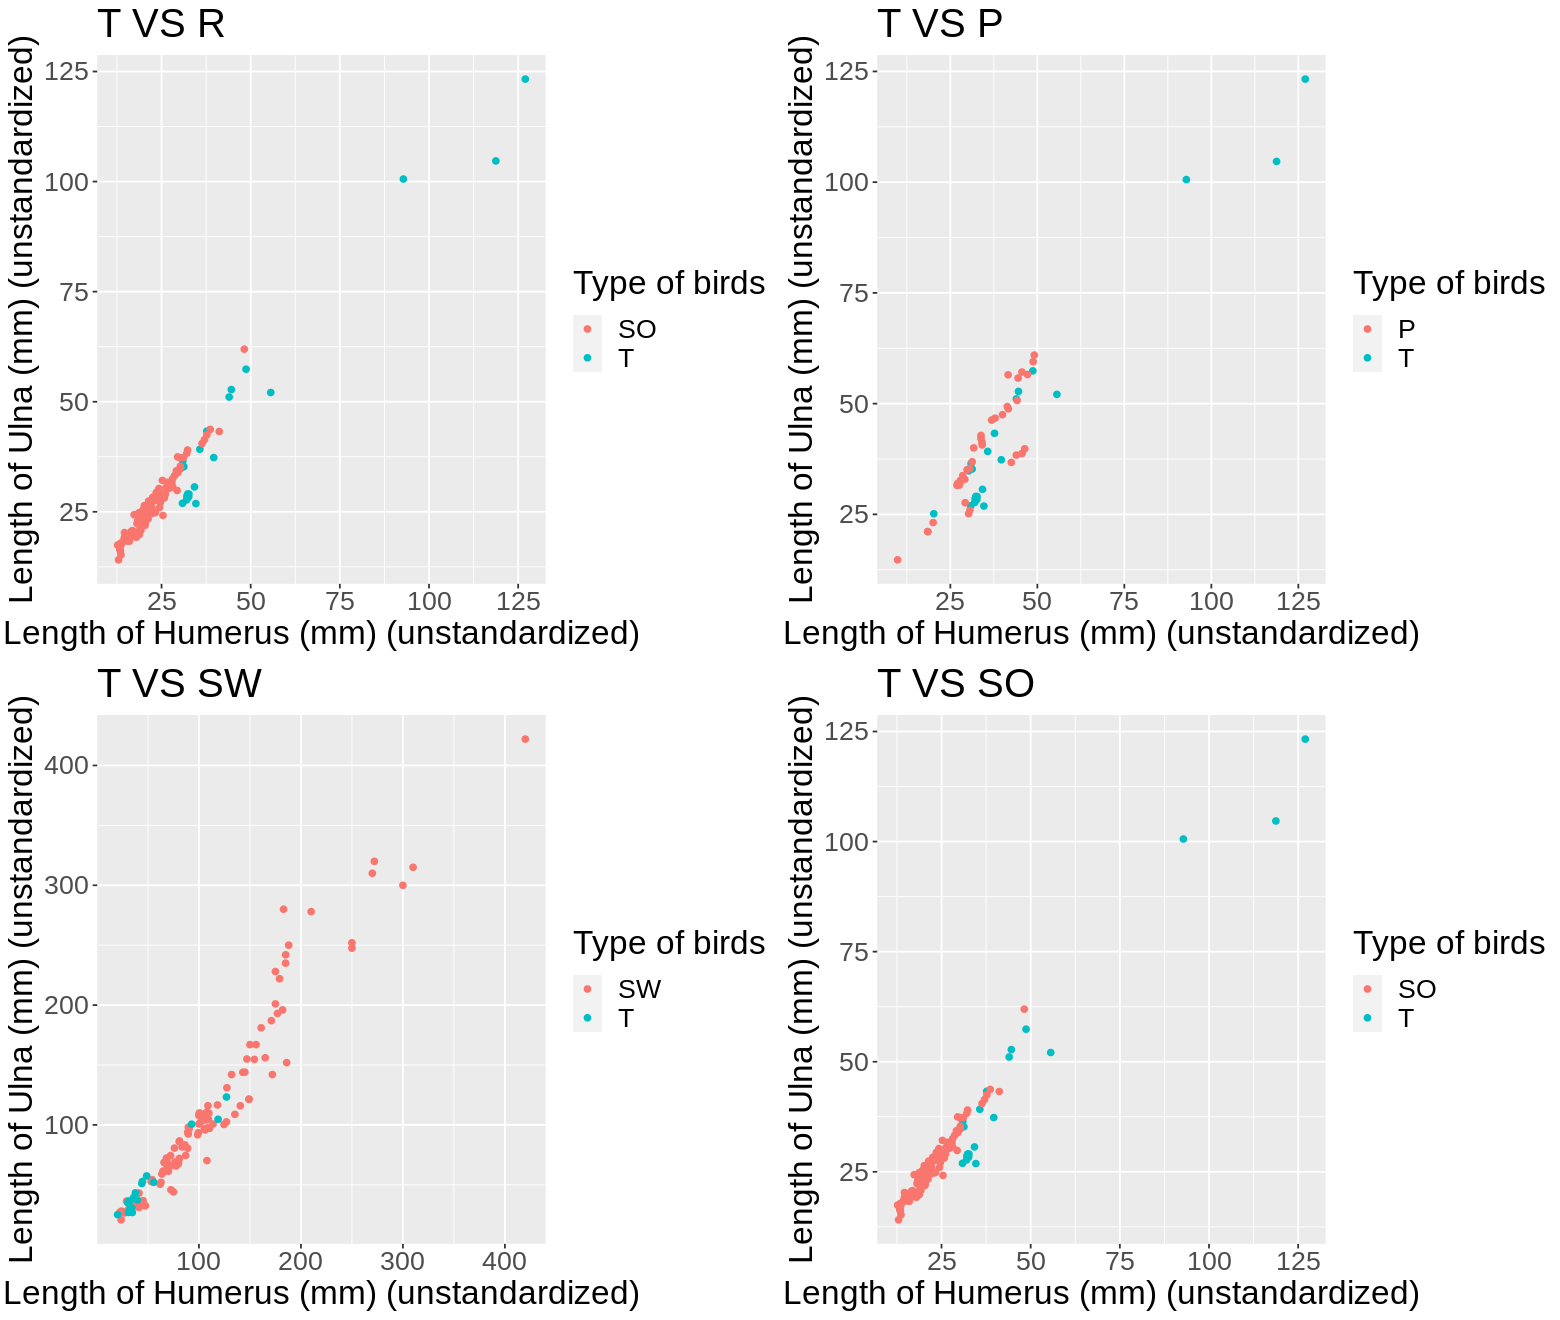

In [15]:
#Compare T to other type of birds
options(repr.plot.width = 13, repr.plot.height = 11) 
bird_data_ulnal_tarl <- bird_data |>
    select(huml, ulnal, type) |>
    filter(type == "T" | type == "SW") 
bird_scrappter_T_SW <- bird_data_ulnal_tarl |>
    ggplot(aes(x = huml, y = ulnal, color = type)) +
        geom_point() +
        labs(x = "Length of Humerus (mm) (unstandardized)",
            y = "Length of Ulna (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("T VS SW")

bird_data_T_SO <- bird_data |>
    select(huml, ulnal, type) |>
    filter(type == "T" | type == "SO")
bird_scrappter_T_SO <- bird_data_T_SO |>
    ggplot(aes(x = huml, y = ulnal, color = type)) +
        geom_point() +
        labs(x = "Length of Humerus (mm) (unstandardized)",
            y = "Length of Ulna (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("T VS SO") 

bird_data_T_R <- bird_data |>
    select(huml, ulnal, type) |>
    filter(type == "T" | type == "SO")
bird_scrappter_T_R <- bird_data_T_R |>
    ggplot(aes(x = huml, y = ulnal, color = type)) +
        geom_point() +
        labs(x = "Length of Humerus (mm) (unstandardized)",
            y = "Length of Ulna (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("T VS R") 

bird_data_T_P <- bird_data |>
    select(huml, ulnal, type) |>
    filter(type == "T" | type == "P")
bird_scrappter_T_P <- bird_data_T_P |>
    ggplot(aes(x = huml, y = ulnal, color = type)) +
        geom_point() +
        labs(x = "Length of Humerus (mm) (unstandardized)",
            y = "Length of Ulna (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 20)) +
            ggtitle("T VS P") 

plot_grid01 <- plot_grid(bird_scrappter_T_R, bird_scrappter_T_P,
                         bird_scrappter_T_SW, bird_scrappter_T_SO, ncol = 2)
plot_grid01

Warning message:
“Removed 2 rows containing missing values (geom_point).”


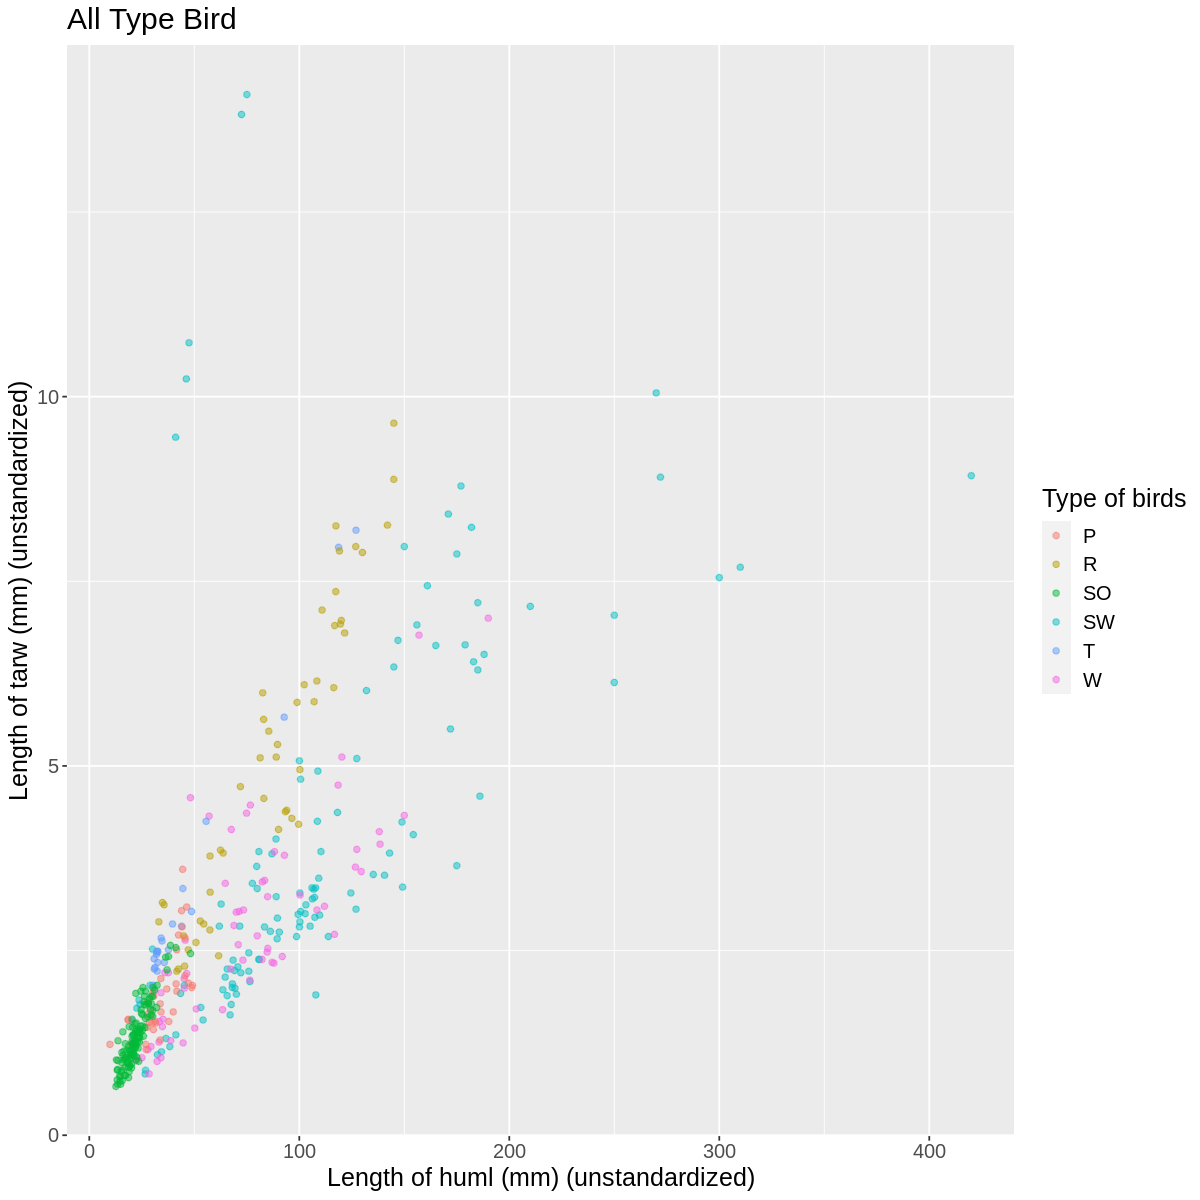

In [16]:
options(repr.plot.width = 10, repr.plot.height = 10) 
bird_data_allbirds <- bird_data |>
    select(huml, tarw, type) 
bird_scrappter <- bird_data_allbirds |>
    ggplot(aes(x = huml, y = tarw, color = type)) +
        geom_point(alpha = 0.5) +
        labs(x = "Length of huml (mm) (unstandardized)",
            y = "Length of tarw (mm) (unstandardized)",
            color = "Type of birds") +
        theme(text = element_text(size = 15)) +
            ggtitle("All Type Bird")

bird_scrappter

## Expected outcomes and significance:
#### Expected outcomes:
In response to our predictive question, based on the background research we have conducted regarding the anatomy of aerial and terrestrial birds, we expect to find that birds with longer total wing lengths are aerial birds, while birds with shorter total wing lengths and longer total leg lengths are terrestrial birds.
#### Impact of Findings:
These findings are helpful for research on bird anatomy as they will tell us how we can predict bird species, flight type and habitat using bird skeletons, telling us valuable information about the birds that live in certain ecosystems. 
#### For Future:
Future questions that arise would be concerning how other variables of bird anatomy such as bone diameter, density and shape can be used to predict bird species.



## Work Cited:
1. https://letsvolunteerla.org/listing-item/natural-history-museum-los-angeles-county/
3. https://media.giphy.com/media/l0K4du1KDvQ8MRPqg/giphy.gif
4. https://s-media-cache-ak0.pinimg.com/564x/cb/cb/41/cbcb41cb2c1db6c32c1e869be2172c3b.jpg
5. Aerial, terrestrial and arboreal birds. (n.d.). Bird Spot. https://www.birdspot.co.uk/identifying-birds/aerial-terrestrial-and-arboreal-birds